In [120]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [121]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import  metrics
from collections import Counter

In [122]:
train_df = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
test_df = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

In [123]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


<Axes: xlabel='is_fraud'>

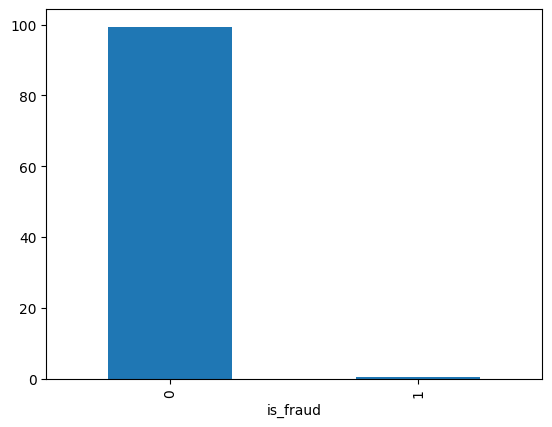

In [124]:
cnt = train_df['is_fraud'].value_counts()
prp = train_df['is_fraud'].value_counts(normalize = True)*100
t = pd.concat([cnt,prp],axis = 1)
t.index = ['Genuine','Fraud']
prp.plot(kind = 'bar')

In [125]:
train_df.isnull().sum().sum()

0

In [126]:
test_df.isnull().sum().sum()

0

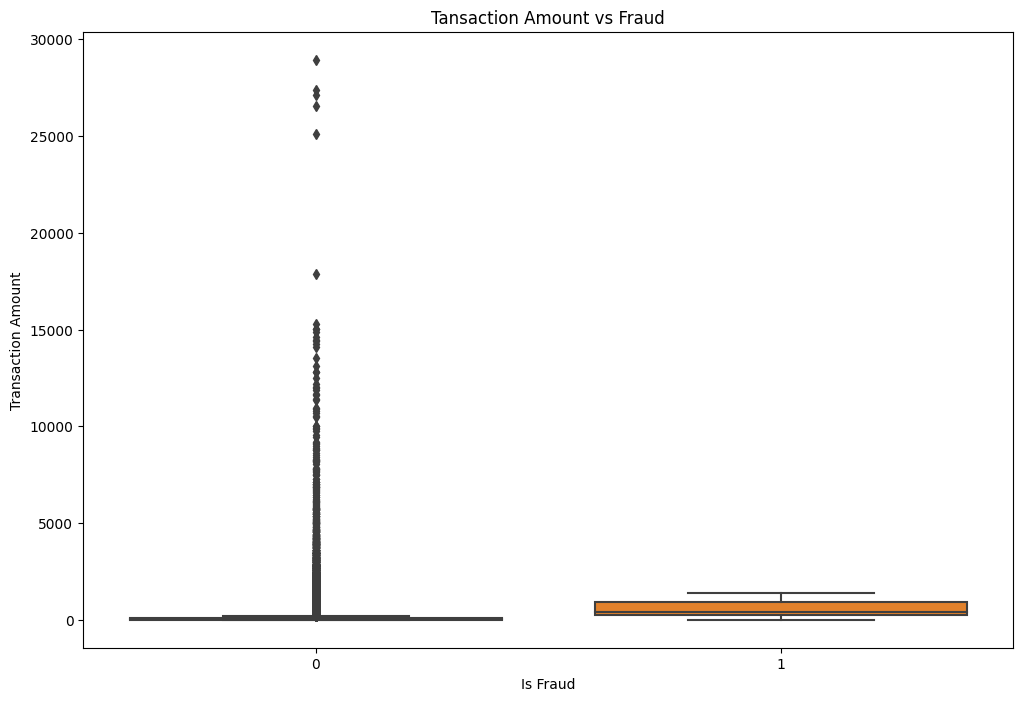

In [127]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'is_fraud' , y = 'amt' , data = train_df)
plt.title("Tansaction Amount vs Fraud")
plt.xlabel("Is Fraud")
plt.ylabel("Transaction Amount")
plt.show()

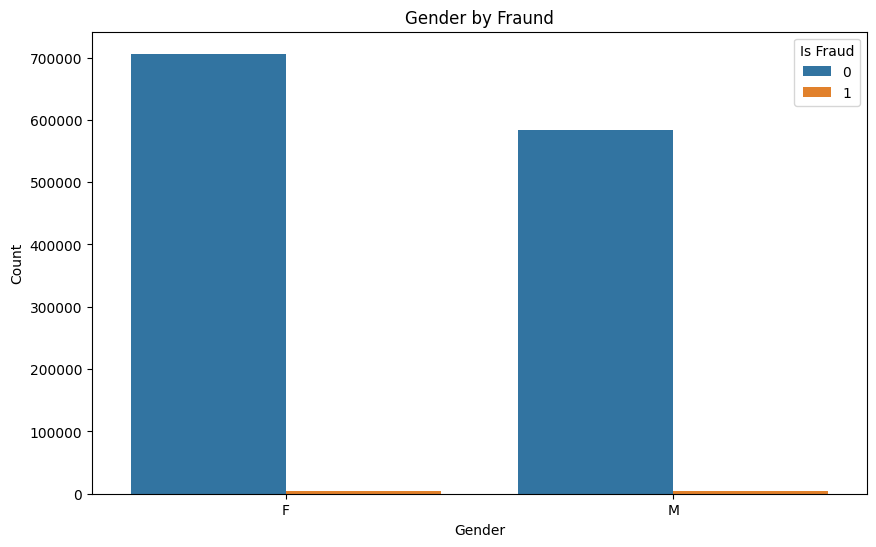

In [128]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'gender', hue ='is_fraud', data = train_df)
plt.title('Gender by Fraund')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title = 'Is Fraud')
plt.show()

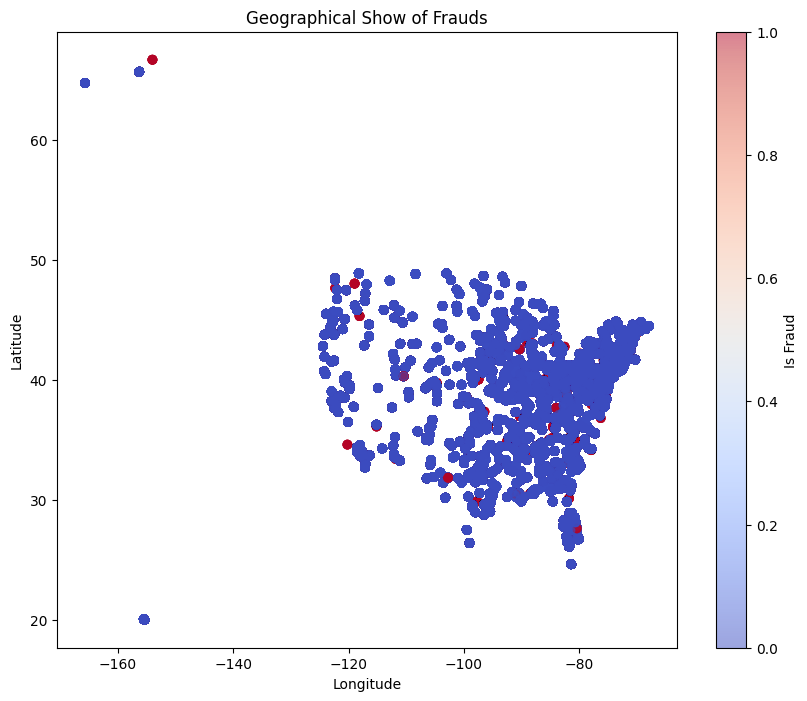

In [129]:
plt.figure(figsize=(10,8))
plt.scatter(train_df['long'],train_df['lat'],c = train_df['is_fraud'],cmap = 'coolwarm',alpha = 0.5)
plt.title("Geographical Show of Frauds")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label = "Is Fraud")
plt.show()

In [130]:
fig = px.pie(values = train_df['is_fraud'].value_counts(),names = ["Genuine","Fraud"] , width=700, height = 400, color_discrete_sequence = ["orange","black"] , title = "Fraud vs Genuine")
fig.show()

In [131]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [132]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [133]:
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [134]:
test_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [135]:
drop_columns = ['Unnamed: 0' , 'cc_num' , 'merchant','trans_num','unix_time','first','last','street','zip']
train_df.drop(columns = drop_columns,inplace = True)
test_df.drop(columns = drop_columns,inplace = True)

In [136]:
print(train_df.shape,
      train_df.describe,
      train_df.head(),
      train_df.tail())

(1296675, 14) <bound method NDFrame.describe of         trans_date_trans_time       category     amt gender  \
0         2019-01-01 00:00:18       misc_net    4.97      F   
1         2019-01-01 00:00:44    grocery_pos  107.23      F   
2         2019-01-01 00:00:51  entertainment  220.11      M   
3         2019-01-01 00:01:16  gas_transport   45.00      M   
4         2019-01-01 00:03:06       misc_pos   41.96      M   
...                       ...            ...     ...    ...   
1296670   2020-06-21 12:12:08  entertainment   15.56      M   
1296671   2020-06-21 12:12:19    food_dining   51.70      M   
1296672   2020-06-21 12:12:32    food_dining  105.93      M   
1296673   2020-06-21 12:13:36    food_dining   74.90      M   
1296674   2020-06-21 12:13:37    food_dining    4.30      M   

                             city state      lat      long  city_pop  \
0                  Moravian Falls    NC  36.0788  -81.1781      3495   
1                          Orient    WA  48.8878 -1

In [137]:
print(test_df.shape,
      test_df.describe,
      test_df.head(),
      test_df.tail())

(555719, 14) <bound method NDFrame.describe of        trans_date_trans_time        category     amt gender          city  \
0        2020-06-21 12:14:25   personal_care    2.86      M      Columbia   
1        2020-06-21 12:14:33   personal_care   29.84      F       Altonah   
2        2020-06-21 12:14:53  health_fitness   41.28      F      Bellmore   
3        2020-06-21 12:15:15        misc_pos   60.05      M    Titusville   
4        2020-06-21 12:15:17          travel    3.19      M      Falmouth   
...                      ...             ...     ...    ...           ...   
555714   2020-12-31 23:59:07  health_fitness   43.77      M         Luray   
555715   2020-12-31 23:59:09       kids_pets  111.84      M  Lake Jackson   
555716   2020-12-31 23:59:15       kids_pets   86.88      F       Burbank   
555717   2020-12-31 23:59:24          travel    7.99      M          Mesa   
555718   2020-12-31 23:59:34   entertainment   38.13      M        Edmond   

       state      lat      l

In [138]:
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
train_df['trans_date'] = train_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train_df['trans_date'] = pd.to_datetime(train_df['trans_date'])
train_df['dob'] = pd.to_datetime(train_df['dob'])

test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])
test_df['trans_date'] = test_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test_df['trans_date'] = pd.to_datetime(test_df['trans_date'])
test_df['dob'] = pd.to_datetime(test_df['dob'])

In [139]:
train_df['trans_month'] = pd.DatetimeIndex(train_df['trans_date']).month
train_df['trans_year'] = pd.DatetimeIndex(train_df['trans_date']).year

In [140]:
train_df['latitudinal_distance'] = abs(round(train_df['merch_lat']-train_df['lat'],3))
train_df['longitudinal_distance'] = abs(round(train_df['merch_long']-train_df['long'],3))

test_df['latitudinal_distance'] = abs(round(test_df['merch_lat']-test_df['lat'],3))
test_df['longitudinal_distance'] = abs(round(test_df['merch_long']-test_df['long'],3))

In [141]:
train_df.head()

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,trans_month,trans_year,latitudinal_distance,longitudinal_distance
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01,1,2019,0.068,0.870
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,1,2019,0.271,0.024
2,2019-01-01 00:00:51,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01,1,2019,0.970,0.108
3,2019-01-01 00:01:16,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01,1,2019,0.804,0.447
4,2019-01-01 00:03:06,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01,1,2019,0.254,0.830


In [142]:
test_df.head()

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,latitudinal_distance,longitudinal_distance
0,2020-06-21 12:14:25,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0,2020-06-21,0.020,0.265
1,2020-06-21 12:14:33,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0,2020-06-21,0.870,0.476
2,2020-06-21 12:14:53,health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0,2020-06-21,0.177,0.660
3,2020-06-21 12:15:15,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0,2020-06-21,0.243,0.064
4,2020-06-21 12:15:17,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0,2020-06-21,0.706,0.868


In [143]:
drop_columns = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
train_df.drop(columns = drop_columns,inplace = True)
test_df.drop(columns = drop_columns,inplace = True)

In [144]:
train_df.gender = train_df.gender.apply(lambda x: 1 if x=="M" else 0)
test_df.gender = test_df.gender.apply(lambda x: 1 if x=="M" else 0 )

In [145]:
train_df.head()

,category,amt,gender,city_pop,is_fraud,trans_month,trans_year,latitudinal_distance,longitudinal_distance
0,misc_net,4.97,0,3495,0,1,2019,0.068,0.870
1,grocery_pos,107.23,0,149,0,1,2019,0.271,0.024
2,entertainment,220.11,1,4154,0,1,2019,0.970,0.108
3,gas_transport,45.00,1,1939,0,1,2019,0.804,0.447
4,misc_pos,41.96,1,99,0,1,2019,0.254,0.830


In [146]:
train_df = pd.get_dummies(train_df, columns = ['category'], prefix = 'category')
test_df = pd.get_dummies(test_df, columns = ['category'], prefix = 'category')

test_df = test_df.reindex(columns = train_df.columns, fill_value = 0)

In [147]:
train_df.head()

,amt,gender,city_pop,is_fraud,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_entertainment,category_food_dining,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495,0,1,2019,0.068,0.870,False,False,...,False,False,False,False,True,False,False,False,False,False
1,107.23,0,149,0,1,2019,0.271,0.024,False,False,...,True,False,False,False,False,False,False,False,False,False
2,220.11,1,4154,0,1,2019,0.970,0.108,True,False,...,False,False,False,False,False,False,False,False,False,False
3,45.00,1,1939,0,1,2019,0.804,0.447,False,False,...,False,False,False,False,False,False,False,False,False,False
4,41.96,1,99,0,1,2019,0.254,0.830,False,False,...,False,False,False,False,False,True,False,False,False,False


In [148]:
test_df.head()

,amt,gender,city_pop,is_fraud,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_entertainment,category_food_dining,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,333497,0,0,0,0.020,0.265,False,False,...,False,False,False,False,False,False,True,False,False,False
1,29.84,0,302,0,0,0,0.870,0.476,False,False,...,False,False,False,False,False,False,True,False,False,False
2,41.28,0,34496,0,0,0,0.177,0.660,False,False,...,False,True,False,False,False,False,False,False,False,False
3,60.05,1,54767,0,0,0,0.243,0.064,False,False,...,False,False,False,False,False,True,False,False,False,False
4,3.19,1,1126,0,0,0,0.706,0.868,False,False,...,False,False,False,False,False,False,False,False,False,True


In [149]:
X_train = train_df.drop('is_fraud',axis = 1)
y_train = train_df['is_fraud']
X_test = test_df.drop('is_fraud',axis = 1)
y_test = test_df['is_fraud']

In [150]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)

X_train,y_train = smote.fit_resample(X_train,y_train)

In [151]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [154]:
y_pred = clf.predict(X_test)

In [155]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.37      0.71      0.49      2145

    accuracy                           0.99    555719
   macro avg       0.69      0.85      0.74    555719
weighted avg       1.00      0.99      1.00    555719

